In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16,10)

In [29]:
carprice = pd.read_csv(
    "https://m2pi.syzygy.ca/data/CarPrice_Assignment.csv")
carprice.shape

(205, 13)

In [30]:
carprice

,Unnamed: 0,car_ID,CarName,doornumber,enginelocation,curbweight,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,alfa-romero giulia,two,front,2548,130,9.0,111,5000,'21',27,13495.0
1,1,2,alfa-romero stelvio,two,front,2548,130,9.0,111,5000,'21',27,16500.0
2,2,3,alfa-romero Quadrifoglio,two,front,2823,152,9.0,154,5000,'19',26,16500.0
3,3,4,audi 100 ls,four,front,2337,109,10.0,102,5500,'24',30,13950.0
4,4,5,audi 100ls,four,front,2824,136,8.0,115,5500,'18',22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,201,volvo 145e (sw),four,front,2952,141,9.5,114,5400,'23',28,16845.0
201,201,202,volvo 144ea,four,front,3049,141,8.7,160,5300,'19',25,19045.0
202,202,203,volvo 244dl,four,front,3012,173,8.8,134,5500,'18',23,21485.0
203,203,204,volvo 246,four,front,3217,145,23.0,106,4800,'26',27,22470.0


In [31]:
carprice.index

RangeIndex(start=0, stop=205, step=1)

In [32]:
carprice.columns

Index(['Unnamed: 0', 'car_ID', 'CarName', 'doornumber', 'enginelocation',
       'curbweight', 'enginesize', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

In [33]:
carprice.dtypes

Unnamed: 0            int64
car_ID                int64
CarName              object
doornumber           object
enginelocation       object
curbweight            int64
enginesize            int64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg              object
highwaympg            int64
price               float64
dtype: object

In [35]:
carprice['citympg'] = pd.to_numeric(carprice['citympg'].apply(lambda x: x.replace("'", "")))
carprice

,Unnamed: 0,car_ID,CarName,doornumber,enginelocation,curbweight,enginesize,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,alfa-romero giulia,two,front,2548,130,9.0,111,5000,21,27,13495.0
1,1,2,alfa-romero stelvio,two,front,2548,130,9.0,111,5000,21,27,16500.0
2,2,3,alfa-romero Quadrifoglio,two,front,2823,152,9.0,154,5000,19,26,16500.0
3,3,4,audi 100 ls,four,front,2337,109,10.0,102,5500,24,30,13950.0
4,4,5,audi 100ls,four,front,2824,136,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,201,volvo 145e (sw),four,front,2952,141,9.5,114,5400,23,28,16845.0
201,201,202,volvo 144ea,four,front,3049,141,8.7,160,5300,19,25,19045.0
202,202,203,volvo 244dl,four,front,3012,173,8.8,134,5500,18,23,21485.0
203,203,204,volvo 246,four,front,3217,145,23.0,106,4800,26,27,22470.0


In [43]:
carprice['highwaympg'].dtype

dtype('int64')

In [44]:
carprice['price'].dtype

dtype('float64')

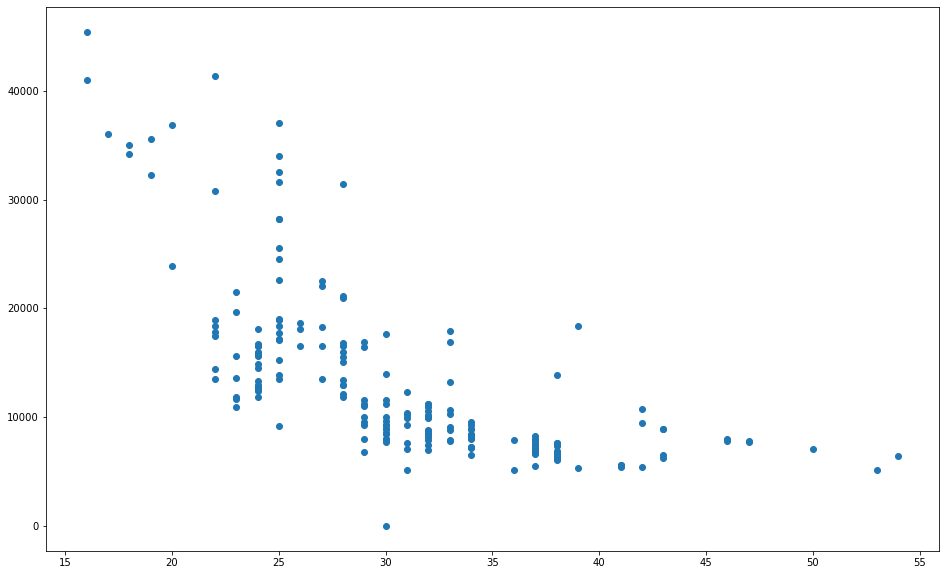

In [52]:
x = carprice['highwaympg']
y = carprice['price']

plt.scatter(x,y)

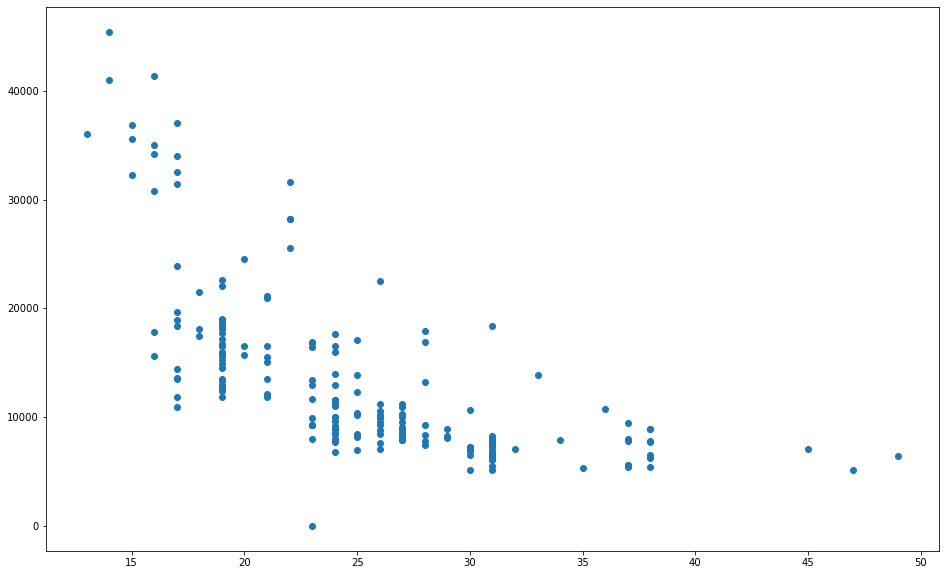

In [47]:
x = carprice['citympg']
y = carprice['price']

plt.scatter(x,y)

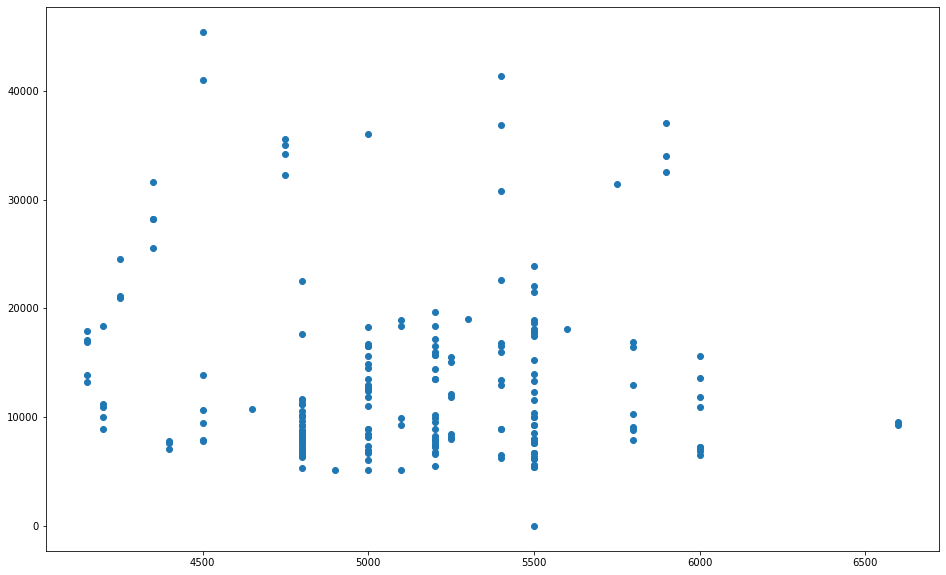

In [53]:
x = carprice['peakrpm']
y = carprice['price']

plt.scatter(x,y)

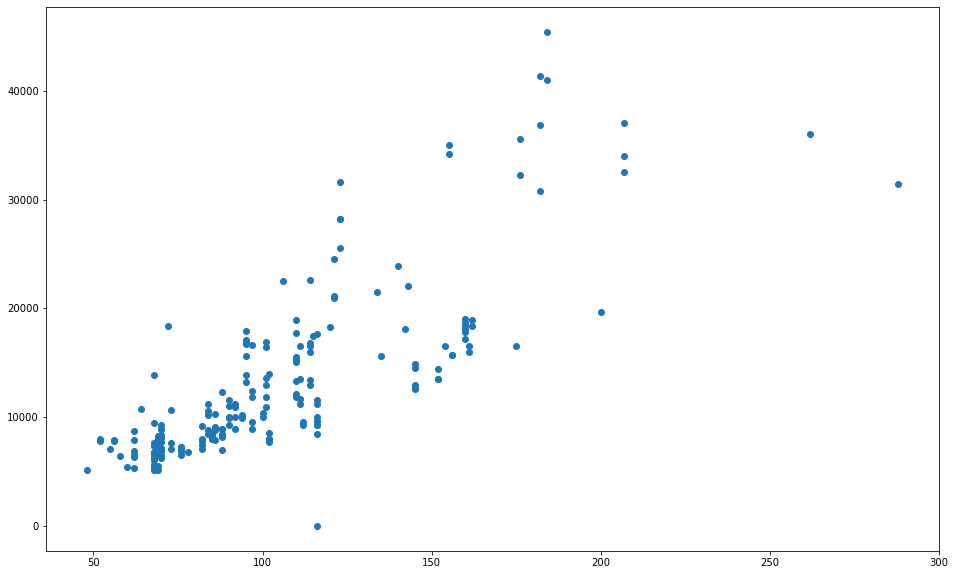

In [54]:
x = carprice['horsepower']
y = carprice['price']

plt.scatter(x,y)

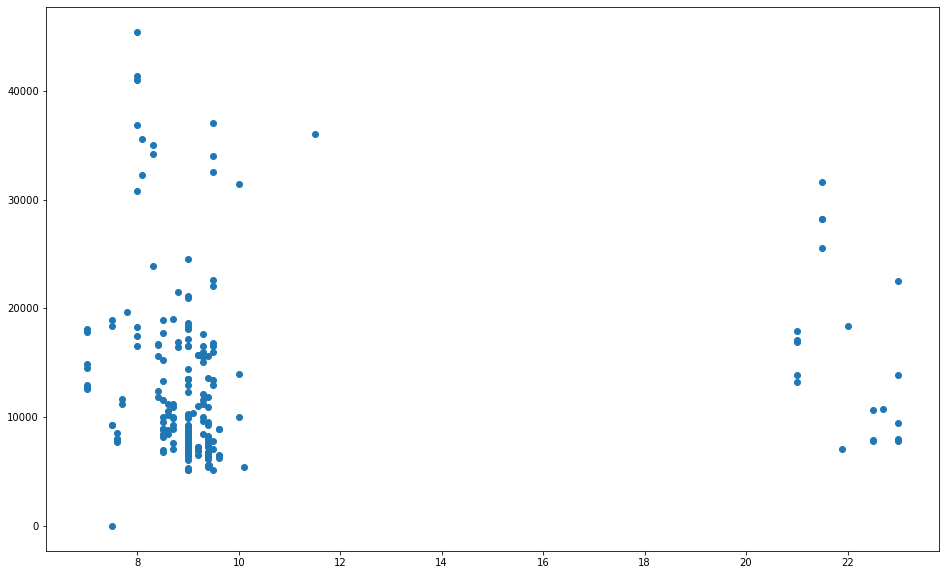

In [55]:
x = carprice['compressionratio']
y = carprice['price']

plt.scatter(x,y)

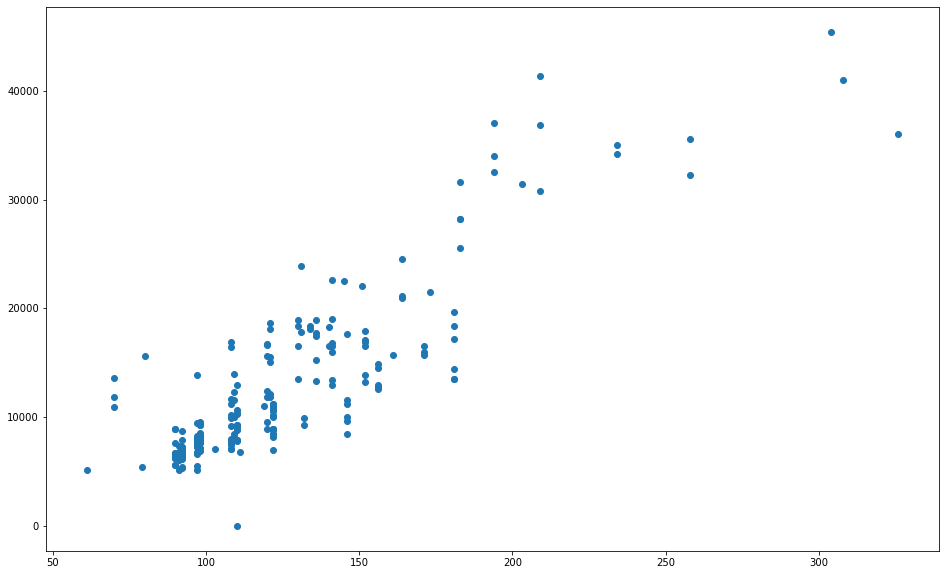

In [56]:
x = carprice['enginesize']
y = carprice['price']

plt.scatter(x,y)

IndexError: index 2 is out of bounds for axis 0 with size 2

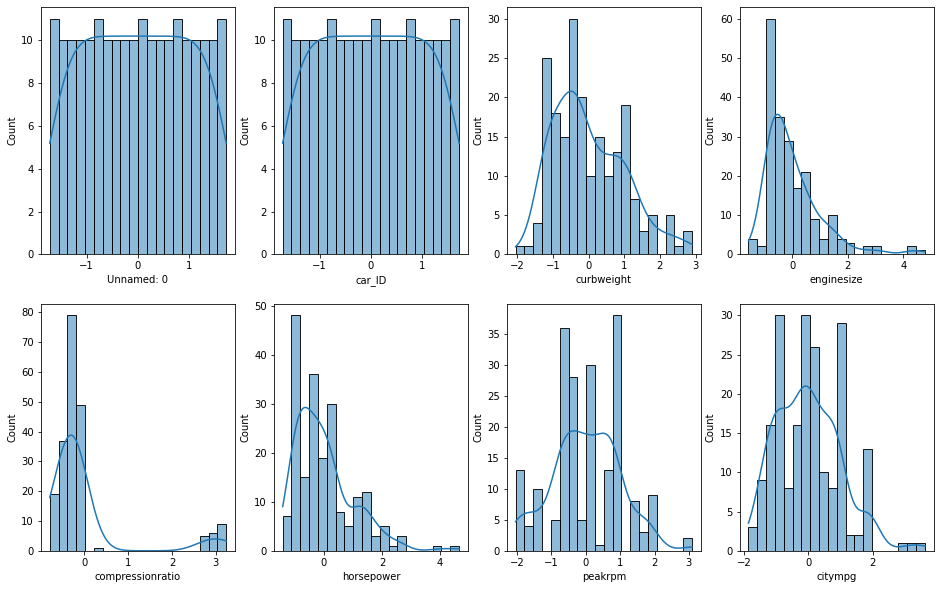

In [58]:
cols = [c for c in carprice.columns if carprice[c].dtype in (np.float64, np.int64)]

for col in cols:
    carprice[col] = (carprice[col] - carprice[col].mean())/carprice[col].std()

fig, ax = plt.subplots(2, 4)
for index, item in enumerate(cols):
    row, col = index//4, index % 4
    sns.histplot(carprice[item], bins=20, kde=True, ax=ax[row, col])
sns.heatmap(
    carprice.corr(), 
    cbar=True,
    annot = True,
    square = True
)


In [59]:
from sklearn import preprocessing

In [60]:
pd.get_dummies?

In [ ]:
from sklearn.model_selection import train_test_split